<a href="https://colab.research.google.com/github/mithamokelvinm/linear_regression_with_tf.keras/blob/main/Linear_Regression_with_tf_keras_and_the_California_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This colab uses a real dataset to predict the prices of houses in California.

**Learning Objectives**
- Read a .csv file into a Pandas DataFrame
- Examine the dataset
- Experiment with different features in building a model
- Tune the model's hyperparameters

**The Dataset**

The dataset used in this notebook is based on the 1990 census in California.
Albeit old, the dataset is a great opportunity to learn about machine learning programming.

In [23]:
# Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granulity of reporting
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

**Load the .csv file into a pandas DataFrame**

Here, we'll gather the .csv file and store the data in memory as a Pandas DataFrame.
The subsequent code cell scales the values in the label `median_house_value`
Scaling will keep the loss values and the learning rates in a friendlier range.


In [24]:
# Import the dataset
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label
training_df["median_house_value"] /= 1000     # divides the left operand with the right operand and assigns the result to the left operand

# Print the first rows of the Pandas DataFrame
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


**Examine the Dataset**

A large part of most machine learning projects is to get to know the data.

The Pandas API provides a describe function that outputs statistics about every column in the DataFrame.



In [25]:
# Get statistics on the dataset
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


**Define functions that build and train a model**

The following code defines two functions:
- build_model(my_learning_rate)  - builds a randomly initialized model
- train_model(model, feature, label, epochs)  - trains model from examples

In [30]:
# Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  
  # Most tf.keras models are sequential
  model = tf.keras.models.Sequential()

  # Describe the the topography of the model.
  # The topography of a simple linear regression model is a single node in a single layer
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that tensorflow can efficiently excecute
  # Configure training to minimize the model's Mean Squared Error
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),
                loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])
  
  return model


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label
  # The model will train for the specified number of epochs
  history = model.fit(x = df[feature],
                      y = df[label],
                      batch_size = batch_size,
                      epochs = epochs)
  
  # Gather the trianed model's weights and bias
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history
  epochs = history.epoch

  # Isolate the error at each epoch
  hist = pd.DataFrame(history.history)

  # To track progression of training, we're going to take a snapshot of the 
  # model's root mean squared error at each epoch
  rmse = hist['root_mean_squared_error']

  return trained_weight, trained_bias, epochs, rmse


print("Defined the build_model and train_model functions")


Defined the build_model and train_model functions


**Define plotting functions**

The following matplotlib functions create the following plots:
- A scatter plot of the feature vs. the label, and a line showing the output of the trained model
- A loss curve

In [31]:
# Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trianed model aganist 200 random training examples."""

  # Label the axis
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts at coordintes
  # (x0,y0) and ends at (x1,y1)
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0,x1], [y0,y1], c='r')

  # Render the scatter plot and the red line
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()


print("Defined the plot_the_model and plot_the_loss_curve functions.")


Defined the plot_the_model and plot_the_loss_curve functions.


**Call the model functions**

An important part of machine learning is determining which features corelate with the label.
For example, real life home value prediction models typically rely on hundreds of features and synthetic features.
However, this model uses only one feature.

Epoch 1/30
567/567 [==============================] - 2s 2ms/step - loss: 1236048.7500 - root_mean_squared_error: 1111.7773
Epoch 2/30
567/567 [==============================] - 1s 2ms/step - loss: 28139.0020 - root_mean_squared_error: 167.7468
Epoch 3/30
567/567 [==============================] - 1s 2ms/step - loss: 27167.6035 - root_mean_squared_error: 164.8260
Epoch 4/30
567/567 [==============================] - 1s 2ms/step - loss: 26681.0684 - root_mean_squared_error: 163.3434
Epoch 5/30
567/567 [==============================] - 1s 2ms/step - loss: 25860.5156 - root_mean_squared_error: 160.8121
Epoch 6/30
567/567 [==============================] - 1s 2ms/step - loss: 25253.0020 - root_mean_squared_error: 158.9119
Epoch 7/30
567/567 [==============================] - 1s 2ms/step - loss: 24453.5371 - root_mean_squared_error: 156.3763
Epoch 8/30
567/567 [==============================] - 1s 2ms/step - loss: 24104.0664 - root_mean_squared_error: 155.2548
Epoch 9/30
567/567 [=========

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


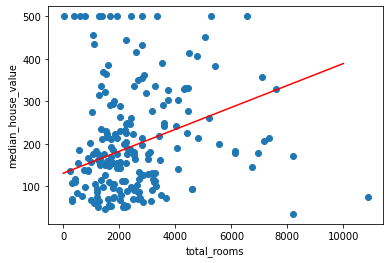

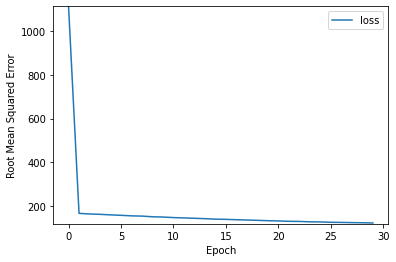

In [32]:
# The following values are the hyperparameters
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label
my_feature = "total_rooms"  # The total number of rooms in a specific city block
my_label = "median_house_value"  # The median house value in a specific city block
# We're going to create a model that predicts house value based solely on total_rooms

# Discard any pre-existing version of the model
my_model = None

# Invoke the functions
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epochs, batch_size)

print("\n The learned weight for your model is %.4f" % weight)
print("\n The learned bias for your model is %.4f \n" % bias)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


**Use the model to make predictions**

You can use the model to make predictions.

In practice, you should make predictions on examples that were not used in training.

However, here we'll just work with a subset of the same training set.

First, run the following code to define the house prediction function:

In [36]:
# Define the house prediction function
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x = batch)

  print("feature      label             predicted")
  print("value        value             value")
  print("             in thousands$     in thousands$")
  print("---------------------------------------")

  for i in range(n):
    print("%5.0f      %6.0f     %15.0f" % (training_df[feature][10000 + i],
                                           training_df[label][10000 + i],
                                           predicted_values[i][0]))

Now let's invoke the fuction on 10 examples:

In [37]:
predict_house_values(10, my_feature, my_label)

feature      label             predicted
value        value             value
             in thousands$     in thousands$
---------------------------------------
 1960          53                 182
 3400          92                 219
 3677          69                 226
 2202          62                 188
 2403          80                 193
 5652         295                 277
 3318         500                 217
 2552         342                 197
 1364         118                 166
 3468         128                 220


**Judge the predictive power of the model**

Look at the preceding table. How close is the predicted value to the label value?

You can try with a different feature by adjusting `my_feature`

You can also try with synthetic values. For example, a ratio of `total_rooms` to `population` ie does the total number of rooms per person have a much higher predictive power than the individual features?

You can also tune the hyperparameters.

**How do you find features correlate with the label easily?**

A correlation matrix indicates how each attribute's raw values relate to the other attribute's raw values.

Correlation values have the following meanings:
- 1.0: Perfect correlation, ie when one attribute rises, the other rises too.
- -1.0: Perfect negative correlation, ie when one attribute rises the other one falls.
- 0.0: No correlation, ie the two columns are not linearly related

In general, the higher the absolute value of a correlation value, the greater it's predictive power.

For example, a correaltion value of -0.8 implies far more predictive power than a correlation of -0.2.

In [38]:
# Generate the correlation matrix for attributes of the California Housing Dataset
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0


Here `median_income` seems to be the feature with the highest predictive power.

There are additional ways to unlock predictive power from potential features.